In [1]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
from pycbc.filter.matchedfilter import match
from pycbc.types.frequencyseries import FrequencySeries
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [2]:
time_of_event = 1246527184.169434
post_trigger_duration = 1.
duration = 16.0
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 2048.

In [3]:
minimum_frequency = 20.0
maximum_frequency = 1024.

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_zero_noise(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)

In [6]:
# with e=0.1
injection_parameters = {'mass_1':13.46, 'mass_2':9.87, 'eccentricity':0.1, 'a_1':0., \
                        'a_2':0., 'tilt_1':0., 'tilt_2':0., 'phi_12':0., 'phi_jl':0., \
                        'luminosity_distance':500., 'theta_jn':2.6, 'psi':1.54, 'phase':3.32, \
                        'geocent_time':1246527184.169434, 'ra':3.32, 'dec':-1.0,}
# with e=0.0
injection_parameters2 = {'mass_1':13.46, 'mass_2':9.87, 'eccentricity':0.0, 'a_1':0., \
                        'a_2':0., 'tilt_1':0., 'tilt_2':0., 'phi_12':0., 'phi_jl':0., \
                        'luminosity_distance':500., 'theta_jn':2.6, 'psi':1.54, 'phase':3.32, \
                        'geocent_time':1246527184.169434, 'ra':3.32, 'dec':-1.0,}

In [7]:
############# TF2Ecck waveform model ################
waveform_arguments0 = dict(waveform_approximant='PerAdvFDLeO',
                          reference_frequency=20., minimum_frequency=20., \
                           pn_phase_order=6, pn_tidal_order=0)

waveform_generator0 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments0)

############# TF2Ecch waveform model ################
waveform_arguments1 = dict(waveform_approximant='TaylorF2Ecck',
                          reference_frequency=20., minimum_frequency=20., \
                           pn_phase_order=6, pn_tidal_order=0)

waveform_generator1 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments1)

13:49 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_binary_black_hole_no_spins
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
13:49 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_binary_black_hole_no_spins
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [8]:
polas1 = waveform_generator0.frequency_domain_strain(parameters = injection_parameters)
polas2 = waveform_generator1.frequency_domain_strain(parameters = injection_parameters)
arr1 = FrequencySeries(polas1['plus'], delta_f=1/duration)
arr2 = FrequencySeries(polas2['plus'], delta_f=1/duration)
psd_ = FrequencySeries(ifos[0].power_spectral_density_array, delta_f=1/duration)
print('match=',match(arr1, arr2, psd=psd_, \
      low_frequency_cutoff=20, high_frequency_cutoff=1024))

match= (0.9989496787208257, 0)


In [10]:
# TF2Ecck vs PerAdvLeO
match_array1 = []
eccn_array = np.linspace(0.01,0.40,20)
for eccn in eccn_array:
    injection_parameters = {'mass_1':13.46, 'mass_2':9.87, 'eccentricity':eccn, 'a_1':0., \
                        'a_2':0., 'tilt_1':0., 'tilt_2':0., 'phi_12':0., 'phi_jl':0., \
                        'luminosity_distance':500., 'theta_jn':2.6, 'psi':1.54, 'phase':3.32, \
                        'geocent_time':1246527184.169434, 'ra':3.32, 'dec':-1.0,}
    
    polas1 = waveform_generator0.frequency_domain_strain(parameters = injection_parameters) # PerAdvLeO
    polas2 = waveform_generator1.frequency_domain_strain(parameters = injection_parameters) # TF2Ecck
    arr1 = FrequencySeries(polas1['plus'], delta_f=1/duration)
    arr2 = FrequencySeries(polas2['plus'], delta_f=1/duration)
    psd_ = FrequencySeries(ifos[0].power_spectral_density_array, delta_f=1/duration)
    match_array1.append(match(arr1, arr2, psd=psd_, low_frequency_cutoff=20, high_frequency_cutoff=1024))
match_array1_0 = np.array(match_array1)[:,0]

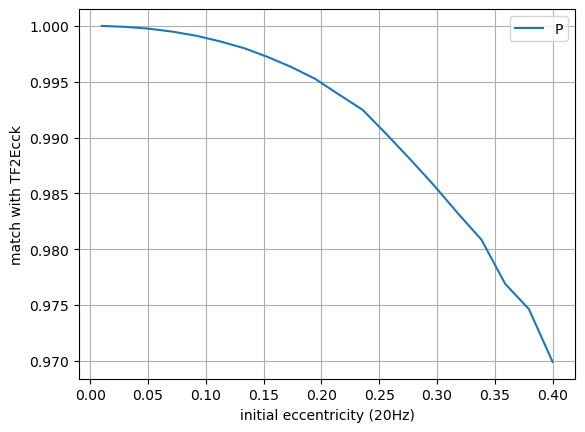

In [11]:
# plus
plt.plot(eccn_array,match_array1_0) 
plt.grid()
plt.gca().legend(('PerAdvLeO vs TF2Ecck'))
plt.xlabel(r"initial eccentricity (20Hz)")
plt.ylabel(r"match with TF2Ecck")
plt.savefig("PerAdvLeO_vs_TF2Ecck.png")
plt.show()